Algorithmic Trading in Python - Simple Moving Averages & Optimization [Follow Up vid]
https://www.youtube.com/watch?v=vWVZxiaaTCs

Video on calculating stock returns:
https://youtu.be/fWHQwqT3lNY

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=yf.download('CDSL.NS',start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
def strategy(df,sma1,sma2):
    df=df.copy()
    df['ret']= np.log(df.Close.pct_change() + 1)
    df['SMA1']= df.Close.rolling(sma1).mean()
    df['SMA2']= df.Close.rolling(sma2).mean()
    df=df.dropna()
    df['position']=np.where(df['SMA1']> df['SMA2'],1,0)
    df['stratret']=df['position'].shift(1)*df['ret']
    df=df.dropna()  
    return df   

def performance(df):
    return np.exp(df[['ret','stratret']].sum())

In [9]:
performance(strategy(df,20,50))

ret         4.264446
stratret    4.033556
dtype: float64

In [10]:
stratdf=strategy(df,20,50)

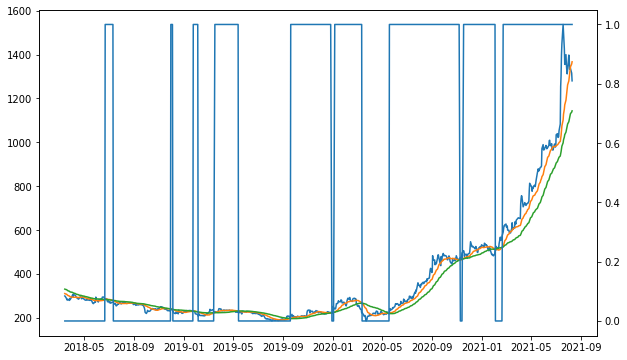

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
ax2= ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf['position'])